<a href="https://colab.research.google.com/github/krdeepak39/Deep-learning-model/blob/main/Cifar_10_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from PIL import Image

In [2]:
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

In [3]:
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


[4]


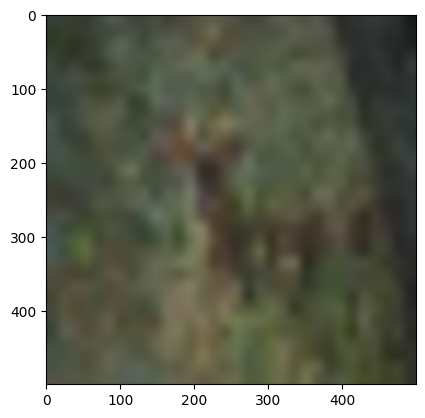

In [4]:
example = train_X[10]
print(train_Y[10])
pil_example = Image.fromarray(example)

# Resize the PIL Image
resized_pil_example = pil_example.resize((500, 500))

# Convert the resized PIL Image back to numpy array
resized_example = np.array(resized_pil_example)

# Display the resized image
plt.imshow(resized_example)
plt.show()

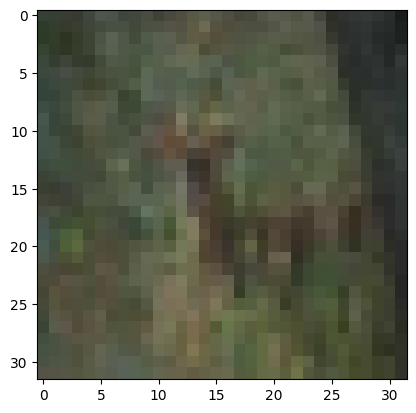

In [5]:
example = example/255
plt.imshow(example, cmap = 'gray')

<ipython-input-6-6d87e1afdb01>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(train_Y[index])


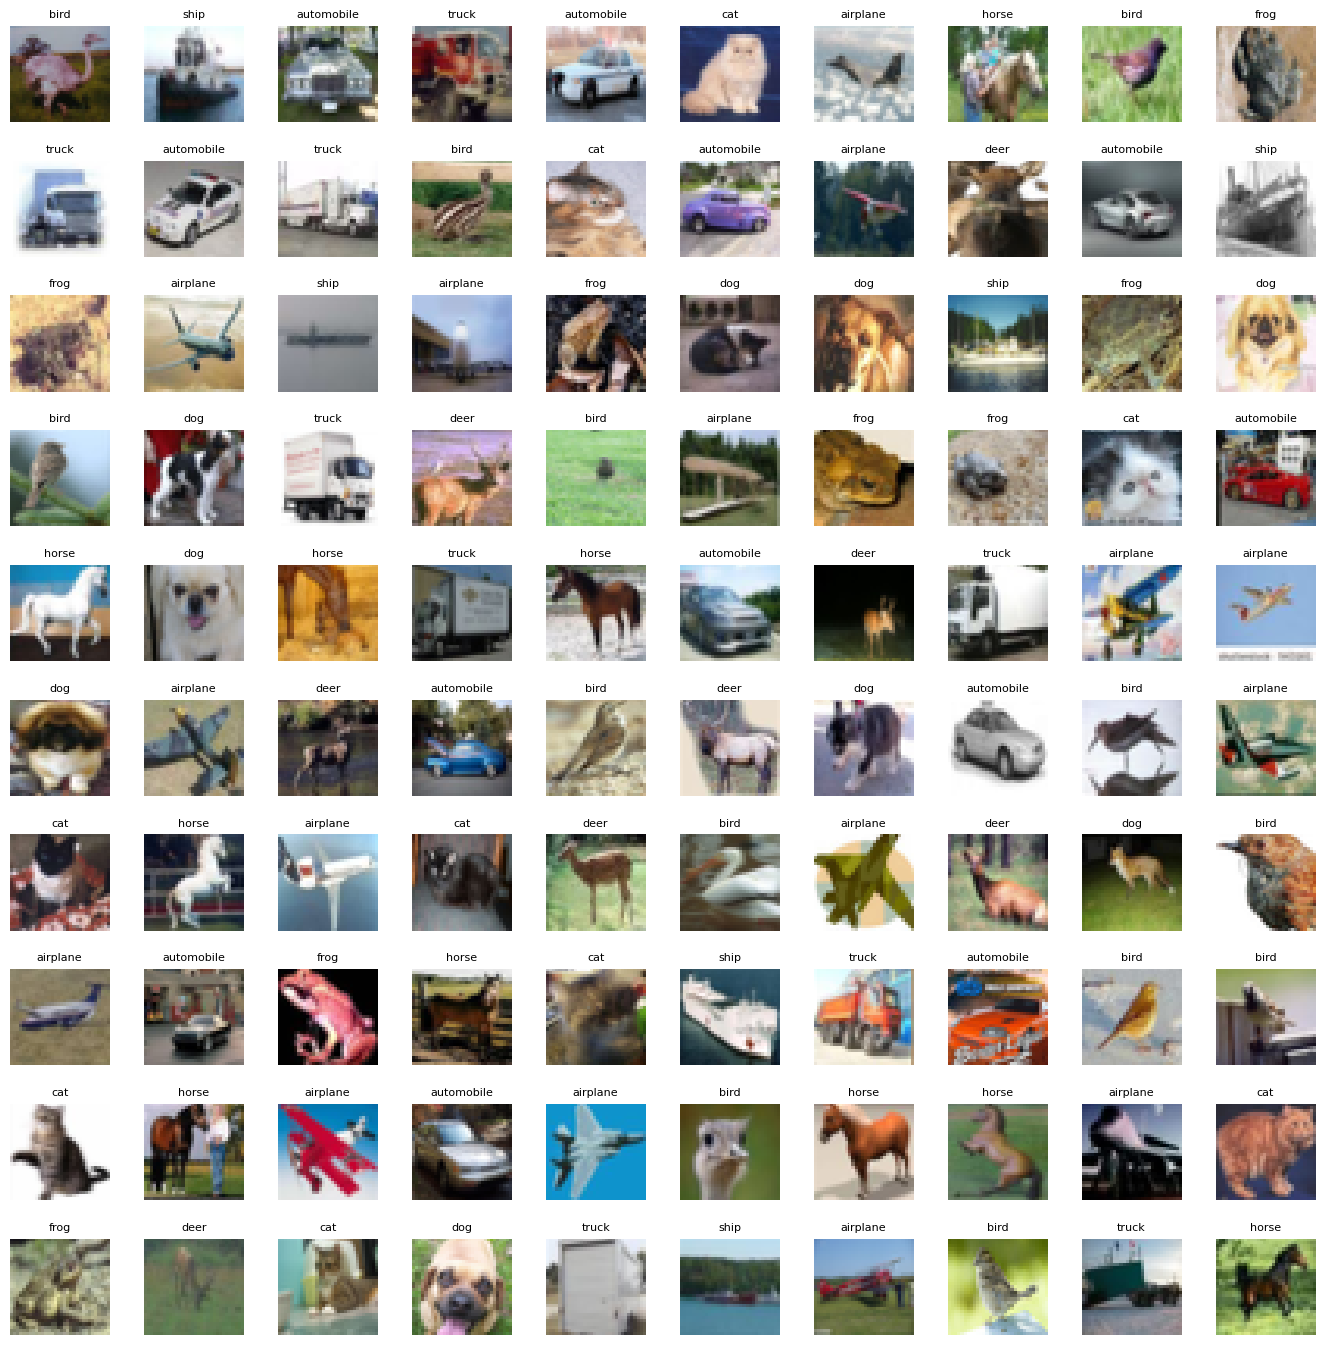

In [6]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(train_X) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow(train_X[index,1:])
    label_index = int(train_Y[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [7]:
train_X = train_X/255
test_X = test_X/255

In [8]:
train_Y[0]

array([6], dtype=uint8)

In [9]:
print(train_X.shape)

(50000, 32, 32, 3)


In [10]:
img_shape = (32, 32, 3)
num_class = 10

In [11]:
train_Y = keras.utils.to_categorical(train_Y, num_classes=num_class)
test_Y = keras.utils.to_categorical(test_Y, num_classes=num_class)


In [12]:
model = keras.Sequential([
    keras.Input(shape=img_shape),
    keras.layers.Conv2D(60, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same'),
    keras.layers.Conv2D(120, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same'),
    keras.layers.Conv2D(240, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(num_class, activation='softmax')
])


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 60)        1680      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 60)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 120)         64920     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 120)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 240)         259440    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 240)         0

In [14]:
model.compile(optimizer = 'Adam', loss = tf.keras.losses.CategoricalCrossentropy(), metrics = [keras.metrics.CategoricalAccuracy()])

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
#train_set = ImageDataGenerator(
#                                rescale = 1/255,
 #                               rotation_range = 40,
 #                               width_shift_range = 0.2,
   #                             height_shift_range = 0.2,
    #                            horizontal_flip = 0.2,
    #                            zoom_range = 0.2)
#valid_set = ImageDataGenerator(rescale = 1/255)


In [17]:
#train_generator = train_set.flow(train_X, train_Y, batch_size=100)

In [18]:
histo = model.fit(train_X, train_Y, epochs=60, validation_data=(test_X, test_Y) )

Epoch 1/60
1563/1563 [==============================] - 169s 107ms/step - loss: 1.5028 - categorical_accuracy: 0.4473 - val_loss: 1.2263 - val_categorical_accuracy: 0.5524
Epoch 2/60
1563/1563 [==============================] - 163s 104ms/step - loss: 1.1145 - categorical_accuracy: 0.5975 - val_loss: 1.0336 - val_categorical_accuracy: 0.6241
Epoch 3/60
1563/1563 [==============================] - 163s 104ms/step - loss: 0.9642 - categorical_accuracy: 0.6589 - val_loss: 0.9509 - val_categorical_accuracy: 0.6571
Epoch 4/60
1563/1563 [==============================] - 170s 109ms/step - loss: 0.8687 - categorical_accuracy: 0.6921 - val_loss: 0.9104 - val_categorical_accuracy: 0.6761
Epoch 5/60
1563/1563 [==============================] - 166s 106ms/step - loss: 0.7985 - categorical_accuracy: 0.7163 - val_loss: 0.8806 - val_categorical_accuracy: 0.6914
Epoch 6/60
1563/1563 [==============================] - 166s 106ms/step - loss: 0.7394 - categorical_accuracy: 0.7364 - val_loss: 0.9021 - v

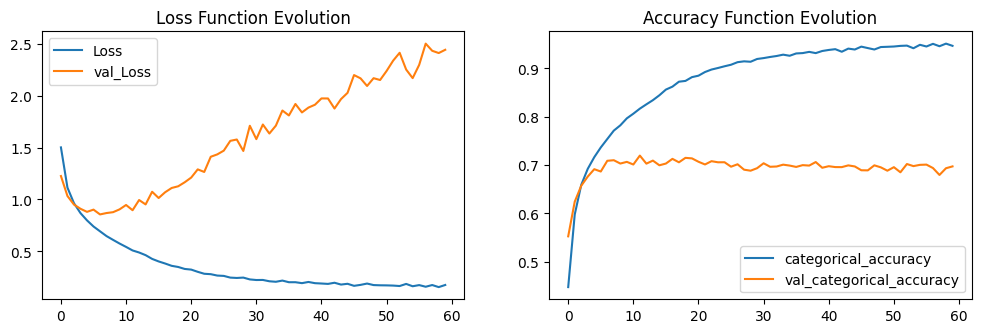

In [19]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(histo.history['loss'], label='Loss')
plt.plot(histo.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(histo.history['categorical_accuracy'], label='categorical_accuracy')
plt.plot(histo.history['val_categorical_accuracy'], label='val_categorical_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()




In [20]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 8s 25ms/step - loss: 2.4448 - categorical_accuracy: 0.6972


[2.444796562194824, 0.6972000002861023]

In [21]:
predictions = model.predict(test_X)

313/313 [==============================] - 7s 22ms/step


In [22]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(32, 32, 3)
(1, 32, 32, 3)
1/1 [==============================] - 0s 22ms/step
[[1.0842511e-17 6.6235536e-16 1.7118474e-07 3.7183182e-13 2.3635463e-10
  3.2940007e-14 9.9999988e-01 1.1878185e-16 1.8402338e-17 4.2682480e-09]] 6
[0.9999999]


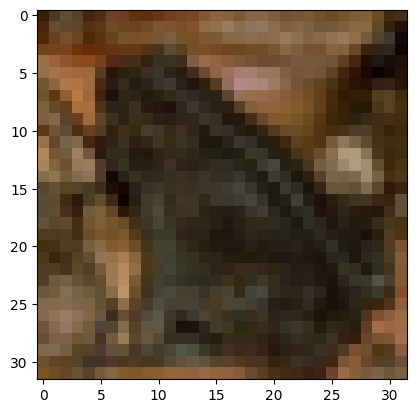

In [23]:
example = test_X[30]
print(test_Y[30])
plt.imshow(example, cmap = 'gray')
print(example.shape)
example = np.expand_dims(example, 0)
print(example.shape)
pred = model.predict(example)
print(pred, np.argmax(pred))
print(pred[pred > 0.5])

In [24]:
def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[i], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)


    if i < len(true_label):
        true_label_i = np.argmax(true_label[i])
        if predicted_label == true_label_i:
            color = 'blue'
        else:
            color = 'red'
        plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                              100*np.max(predictions_array),
                                              class_names[true_label_i]),
                                              color=color)
    else:
        print("Index out of bounds:", i)

def plot_value_array(i, predictions_array, true_label):
  plt.grid(False)
  plt.xticks(range(num_class))
  plt.yticks([])
  thisplot = plt.bar(range(num_class), predictions_array, color="#777777")
  plt.ylim([0, 1])

  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label[i])

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

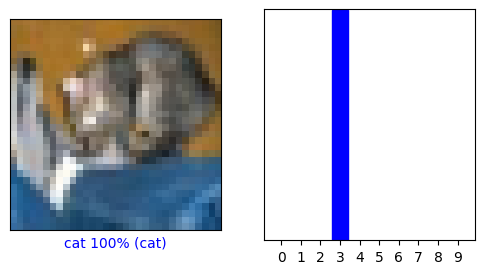

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_Y, test_X)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_Y)
plt.show()

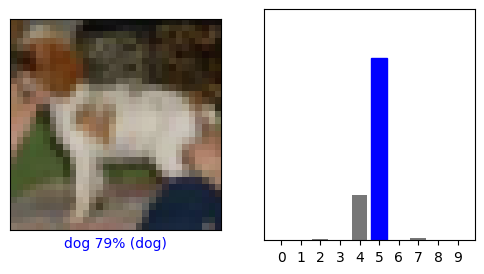

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_Y, test_X)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_Y)
plt.show()

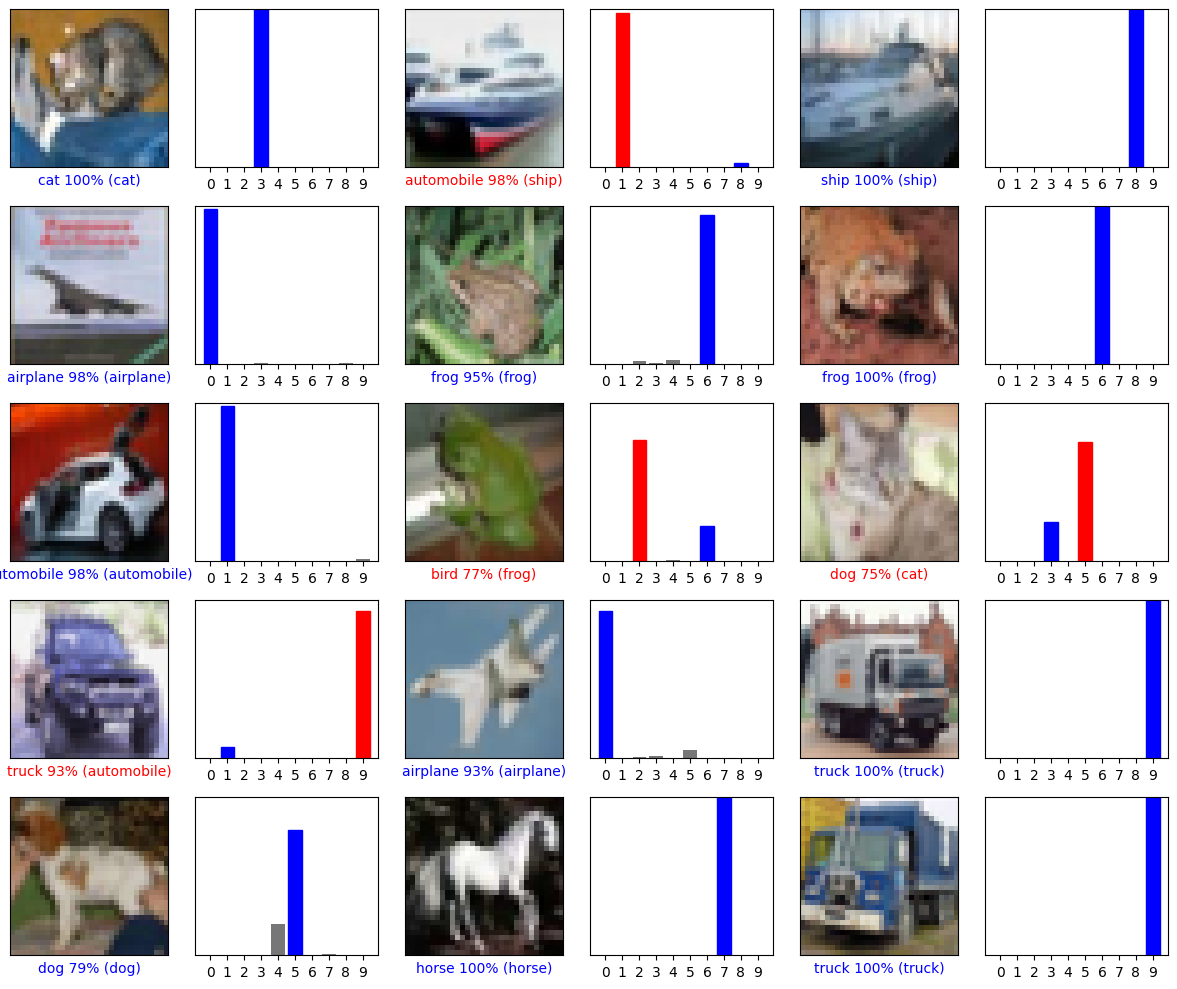

In [27]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_Y, test_X)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_Y)
plt.tight_layout()
plt.show()
